In [1]:
import torch  
from torch import nn, optim  
import torch.nn.functional as func
from torchvision import datasets, transforms # 导入数据集与数据预处理的方法import torchvision
import matplotlib.pyplot as plt
%matplotlib inline

data_path = "D:/code/git/fashion-mnist/data/fashion"
# 数据预处理：标准化图像数据，使得灰度数据在-1到+1之间
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])

batch_size = 64
# 下载Fashion-MNIST训练集和测试集数据，并构建训练集数据载入器trainloader
trainset = datasets.FashionMNIST('data_path', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, drop_last=True)

testset = datasets.FashionMNIST('data_path', download=True,train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True, drop_last=True)

In [2]:
#定义一个训练模型
def train(model, trainloader, testloader, loss_func, optimizer, epochs, is_show = True):
    train_losses, test_losses = [], []
    
    for i in range(epochs):
        running_loss = 0
        
        for images, labels in trainloader:
            #梯度清零
            optimizer.zero_grad()
            #向前传播
            img_pred = model(images)
            #计算损失
            loss = loss_func(img_pred, labels)
            #反向传播
            loss.backward()
            #参数更新
            optimizer.step()
            running_loss += loss.item()
        
        test_loss = 0
        accuracy = 0
        
        with torch.no_grad():
            model.eval()
            
            for images, labels in testloader:
                img_pred = model(images)
                test_loss += loss_func(img_pred, labels)
                ps = torch.exp(img_pred)
                _, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        model.train()
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        
        if(is_show):
            print("学习次数: {}/{}\t".format(i+1, epochs),
                  "训练误差: {:.2f}\t".format(running_loss/len(trainloader)),
                  "测试误差: {:.2f}\t".format(test_loss/len(testloader)),
                  "模型分类准确率: {:.2f}".format(accuracy/len(testloader)))
    
    # 绘制误差变化曲线
    plt.plot(train_losses, label='Training loss')
    plt.plot(test_losses, label='Validation loss')
    plt.legend()

a、感知机的层数并不是越深越好，过深的层数也会带来一些问题，如梯度消失和梯度爆炸。

In [3]:
#定义一个3层模型
class Net_wide(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 10)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        # 确保输入的tensor是展开的单列数据，把每张图片的通道、长度、宽度三个维度都压缩为一列
        x = x.view(x.shape[0], -1)     
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = func.log_softmax(self.fc3(x), dim=1)
        
        return x

#定义一个6层模型
class Net_deep(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 128)
        self.fc4 = nn.Linear(128, 128)
        self.fc5 = nn.Linear(128, 128)
        self.fc6 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        # 确保输入的tensor是展开的单列数据，把每张图片的通道、长度、宽度三个维度都压缩为一列
        x = x.view(x.shape[0], -1)     
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.relu(self.fc5(x))
        x = func.log_softmax(self.fc6(x), dim=1)
        
        return x

学习次数: 1/15	 训练误差: 0.60	 测试误差: 0.55	 模型分类准确率: 0.81
学习次数: 2/15	 训练误差: 0.47	 测试误差: 0.52	 模型分类准确率: 0.81
学习次数: 3/15	 训练误差: 0.45	 测试误差: 0.50	 模型分类准确率: 0.83
学习次数: 4/15	 训练误差: 0.44	 测试误差: 0.53	 模型分类准确率: 0.83
学习次数: 5/15	 训练误差: 0.43	 测试误差: 0.47	 模型分类准确率: 0.83
学习次数: 6/15	 训练误差: 0.41	 测试误差: 0.44	 模型分类准确率: 0.85
学习次数: 7/15	 训练误差: 0.41	 测试误差: 0.50	 模型分类准确率: 0.83
学习次数: 8/15	 训练误差: 0.41	 测试误差: 0.46	 模型分类准确率: 0.84
学习次数: 9/15	 训练误差: 0.39	 测试误差: 0.46	 模型分类准确率: 0.84
学习次数: 10/15	 训练误差: 0.41	 测试误差: 0.44	 模型分类准确率: 0.85
学习次数: 11/15	 训练误差: 0.39	 测试误差: 0.48	 模型分类准确率: 0.84
学习次数: 12/15	 训练误差: 0.39	 测试误差: 0.49	 模型分类准确率: 0.84
学习次数: 13/15	 训练误差: 0.39	 测试误差: 0.45	 模型分类准确率: 0.85
学习次数: 14/15	 训练误差: 0.38	 测试误差: 0.49	 模型分类准确率: 0.84
学习次数: 15/15	 训练误差: 0.38	 测试误差: 0.46	 模型分类准确率: 0.85


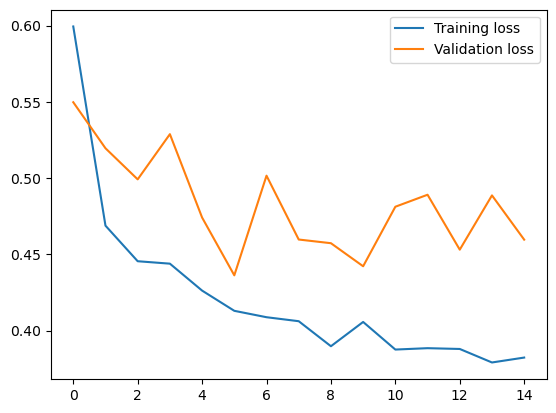

In [4]:
#运行浅层模型
model = Net_wide()

# 定义损失函数
loss_func = nn.CrossEntropyLoss()

# 定义优化方法
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 定义迭代次数
epochs = 15

# 调用训练函数
train(model, trainloader, testloader, loss_func, optimizer, epochs)

学习次数: 1/15	 训练误差: 2.30	 测试误差: 2.30	 模型分类准确率: 0.10
学习次数: 2/15	 训练误差: 2.30	 测试误差: 2.30	 模型分类准确率: 0.10
学习次数: 3/15	 训练误差: 2.30	 测试误差: 2.30	 模型分类准确率: 0.10
学习次数: 4/15	 训练误差: 2.30	 测试误差: 2.30	 模型分类准确率: 0.10
学习次数: 5/15	 训练误差: 2.30	 测试误差: 2.30	 模型分类准确率: 0.10
学习次数: 6/15	 训练误差: 2.30	 测试误差: 2.30	 模型分类准确率: 0.10
学习次数: 7/15	 训练误差: 2.30	 测试误差: 2.30	 模型分类准确率: 0.10
学习次数: 8/15	 训练误差: 2.30	 测试误差: 2.30	 模型分类准确率: 0.10
学习次数: 9/15	 训练误差: 2.30	 测试误差: 2.30	 模型分类准确率: 0.10
学习次数: 10/15	 训练误差: 2.30	 测试误差: 2.30	 模型分类准确率: 0.10
学习次数: 11/15	 训练误差: 2.30	 测试误差: 2.30	 模型分类准确率: 0.10
学习次数: 12/15	 训练误差: 2.30	 测试误差: 2.30	 模型分类准确率: 0.10
学习次数: 13/15	 训练误差: 2.30	 测试误差: 2.30	 模型分类准确率: 0.10
学习次数: 14/15	 训练误差: 2.30	 测试误差: 2.30	 模型分类准确率: 0.10
学习次数: 15/15	 训练误差: 2.30	 测试误差: 2.30	 模型分类准确率: 0.10


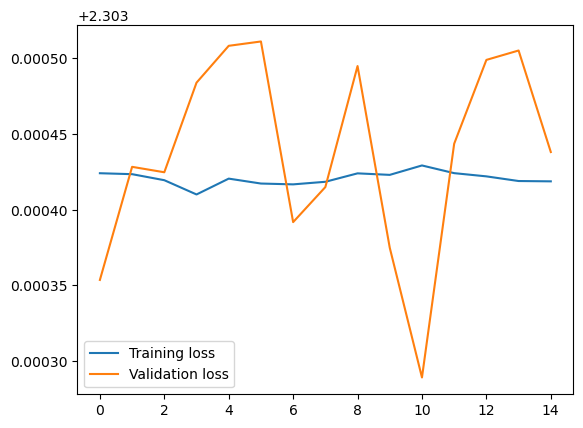

In [5]:
#运行深层模型
model = Net_deep()
train(model, trainloader, testloader, loss_func, optimizer, epochs)

由上面两图可以看出过深的神经网络并不能带来更好的效果，过深的神经网络反而无法完成测试

a、 感知机的维度也不是越大越好。较大的维度会增加模型的复杂度和计算负担，同时可能导致过拟合问题。

In [6]:
#定义一个高维模型
class Net_high(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 784*2)
        self.fc2 = nn.Linear(784*2, 784*2)
        self.fc3 = nn.Linear(784*2, 10)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        # 确保输入的tensor是展开的单列数据，把每张图片的通道、长度、宽度三个维度都压缩为一列
        x = x.view(x.shape[0], -1)     
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = func.log_softmax(self.fc3(x), dim=1)
        return x

学习次数: 1/15	 训练误差: 0.84	 测试误差: 0.61	 模型分类准确率: 0.81
学习次数: 2/15	 训练误差: 0.48	 测试误差: 0.48	 模型分类准确率: 0.84
学习次数: 3/15	 训练误差: 0.47	 测试误差: 0.51	 模型分类准确率: 0.84
学习次数: 4/15	 训练误差: 0.45	 测试误差: 0.48	 模型分类准确率: 0.83
学习次数: 5/15	 训练误差: 0.44	 测试误差: 0.48	 模型分类准确率: 0.84
学习次数: 6/15	 训练误差: 0.41	 测试误差: 0.52	 模型分类准确率: 0.82
学习次数: 7/15	 训练误差: 0.40	 测试误差: 0.45	 模型分类准确率: 0.84
学习次数: 8/15	 训练误差: 0.40	 测试误差: 0.50	 模型分类准确率: 0.83
学习次数: 9/15	 训练误差: 0.41	 测试误差: 0.46	 模型分类准确率: 0.84
学习次数: 10/15	 训练误差: 0.40	 测试误差: 0.47	 模型分类准确率: 0.84
学习次数: 11/15	 训练误差: 0.40	 测试误差: 0.44	 模型分类准确率: 0.85
学习次数: 12/15	 训练误差: 0.39	 测试误差: 0.50	 模型分类准确率: 0.84
学习次数: 13/15	 训练误差: 0.37	 测试误差: 0.49	 模型分类准确率: 0.84
学习次数: 14/15	 训练误差: 0.38	 测试误差: 0.48	 模型分类准确率: 0.85
学习次数: 15/15	 训练误差: 0.39	 测试误差: 0.46	 模型分类准确率: 0.85


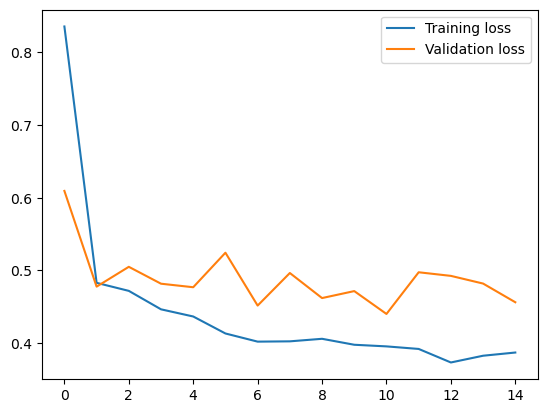

In [7]:
model = Net_high()

# 定义损失函数
loss_func = nn.CrossEntropyLoss()

# 定义优化方法
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 定义迭代次数
epochs = 15

# 调用训练函数
train(model, trainloader, testloader, loss_func, optimizer, epochs)

b、由图中可以看出，在第迭代5轮后，模型的准确度就已经达到了较高的水平，且继续迭代并未显著增加模型的准确度，且可能导致过拟合现象的发生，所以迭代次数在5到10轮比较合适

c、暂退法

In [8]:
#定义一个暂退法的模型
class Net_drop(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.relu = nn.ReLU()
        # 构造Dropout方法，防止过拟合。
        self.dropout = nn.Dropout(p=0.3)
        
    def forward(self, x):
        # 确保输入的tensor是展开的单列数据，把每张图片的通道、长度、宽度三个维度都压缩为一列
        x = x.view(x.shape[0], -1)        
        # 在训练过程中对隐含层神经元的正向推断使用Dropout方法
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.dropout(self.relu(self.fc2(x)))
        x = func.log_softmax(self.fc3(x), dim=1)
        
        return x

学习次数: 1/20	 训练误差: 0.54	 测试误差: 0.44	 模型分类准确率: 0.84
学习次数: 2/20	 训练误差: 0.42	 测试误差: 0.40	 模型分类准确率: 0.86
学习次数: 3/20	 训练误差: 0.39	 测试误差: 0.38	 模型分类准确率: 0.87
学习次数: 4/20	 训练误差: 0.37	 测试误差: 0.38	 模型分类准确率: 0.86
学习次数: 5/20	 训练误差: 0.35	 测试误差: 0.37	 模型分类准确率: 0.87
学习次数: 6/20	 训练误差: 0.34	 测试误差: 0.36	 模型分类准确率: 0.87
学习次数: 7/20	 训练误差: 0.33	 测试误差: 0.34	 模型分类准确率: 0.88
学习次数: 8/20	 训练误差: 0.32	 测试误差: 0.35	 模型分类准确率: 0.87
学习次数: 9/20	 训练误差: 0.31	 测试误差: 0.33	 模型分类准确率: 0.88
学习次数: 10/20	 训练误差: 0.31	 测试误差: 0.33	 模型分类准确率: 0.88
学习次数: 11/20	 训练误差: 0.30	 测试误差: 0.34	 模型分类准确率: 0.88
学习次数: 12/20	 训练误差: 0.30	 测试误差: 0.34	 模型分类准确率: 0.88
学习次数: 13/20	 训练误差: 0.29	 测试误差: 0.32	 模型分类准确率: 0.88
学习次数: 14/20	 训练误差: 0.28	 测试误差: 0.33	 模型分类准确率: 0.88
学习次数: 15/20	 训练误差: 0.28	 测试误差: 0.34	 模型分类准确率: 0.88
学习次数: 16/20	 训练误差: 0.27	 测试误差: 0.33	 模型分类准确率: 0.88
学习次数: 17/20	 训练误差: 0.27	 测试误差: 0.33	 模型分类准确率: 0.88
学习次数: 18/20	 训练误差: 0.27	 测试误差: 0.33	 模型分类准确率: 0.88
学习次数: 19/20	 训练误差: 0.27	 测试误差: 0.32	 模型分类准确率: 0.89
学习次数: 20/20	 训练误差: 0.26	 测试误差: 0.31	 模型分

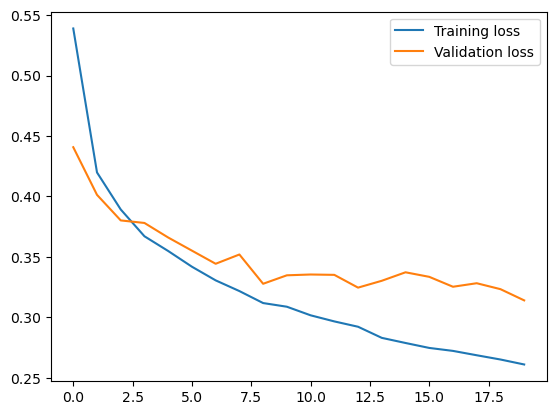

In [9]:
#运行暂退法模型
model = Net_drop()

# 定义损失函数
loss_func = nn.CrossEntropyLoss()

# 定义优化方法
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 定义迭代次数
epochs = 20

# 调用训练函数
train(model, trainloader, testloader, loss_func, optimizer, epochs)

正则化

学习次数: 1/20	 训练误差: 0.69	 测试误差: 0.54	 模型分类准确率: 0.80
学习次数: 2/20	 训练误差: 0.61	 测试误差: 0.54	 模型分类准确率: 0.81
学习次数: 3/20	 训练误差: 0.58	 测试误差: 0.51	 模型分类准确率: 0.81
学习次数: 4/20	 训练误差: 0.57	 测试误差: 0.50	 模型分类准确率: 0.82
学习次数: 5/20	 训练误差: 0.56	 测试误差: 0.51	 模型分类准确率: 0.81
学习次数: 6/20	 训练误差: 0.56	 测试误差: 0.46	 模型分类准确率: 0.84
学习次数: 7/20	 训练误差: 0.56	 测试误差: 0.50	 模型分类准确率: 0.82
学习次数: 8/20	 训练误差: 0.55	 测试误差: 0.51	 模型分类准确率: 0.82
学习次数: 9/20	 训练误差: 0.55	 测试误差: 0.47	 模型分类准确率: 0.83
学习次数: 10/20	 训练误差: 0.55	 测试误差: 0.47	 模型分类准确率: 0.83
学习次数: 11/20	 训练误差: 0.55	 测试误差: 0.48	 模型分类准确率: 0.83
学习次数: 12/20	 训练误差: 0.55	 测试误差: 0.47	 模型分类准确率: 0.83
学习次数: 13/20	 训练误差: 0.55	 测试误差: 0.48	 模型分类准确率: 0.83
学习次数: 14/20	 训练误差: 0.55	 测试误差: 0.47	 模型分类准确率: 0.83
学习次数: 15/20	 训练误差: 0.55	 测试误差: 0.50	 模型分类准确率: 0.82
学习次数: 16/20	 训练误差: 0.54	 测试误差: 0.47	 模型分类准确率: 0.83
学习次数: 17/20	 训练误差: 0.55	 测试误差: 0.47	 模型分类准确率: 0.83
学习次数: 18/20	 训练误差: 0.54	 测试误差: 0.47	 模型分类准确率: 0.83
学习次数: 19/20	 训练误差: 0.54	 测试误差: 0.47	 模型分类准确率: 0.84
学习次数: 20/20	 训练误差: 0.55	 测试误差: 0.48	 模型分

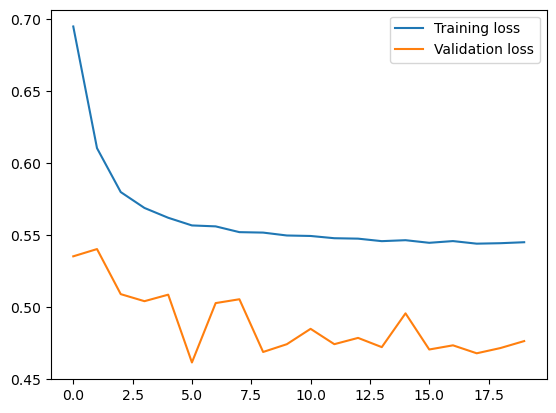

In [10]:
#运行浅层模型
model = Net_wide()
weight_decay=0.01
epochs = 20
loss_func = nn.CrossEntropyLoss()
# 定义优化方法
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)

train_losses, test_losses = [], []
for i in range(epochs):
    running_loss = 0

    for images, labels in trainloader:
        #梯度清零
        optimizer.zero_grad()
        #向前传播
        img_pred = model(images)
        #计算损失
        loss = loss_func(img_pred, labels)
        # 添加权重衰减项
        # 添加权重衰减项
        l2_reg = torch.tensor(0.)
        for param in model.parameters():
            l2_reg += torch.norm(param)
        loss += weight_decay * l2_reg
        #反向传播
        loss.backward()
        #参数更新
        optimizer.step()
        running_loss += loss.item()

    test_loss = 0
    accuracy = 0

    with torch.no_grad():
        model.eval()

        for images, labels in testloader:
            img_pred = model(images)
            test_loss += loss_func(img_pred, labels)
            ps = torch.exp(img_pred)
            _, top_class = ps.topk(1, dim=1)
            equals = top_class == labels.view(*top_class.shape)
            accuracy += torch.mean(equals.type(torch.FloatTensor))

    model.train()

    train_losses.append(running_loss/len(trainloader))
    test_losses.append(test_loss/len(testloader))

    print("学习次数: {}/{}\t".format(i+1, epochs),
          "训练误差: {:.2f}\t".format(running_loss/len(trainloader)),
          "测试误差: {:.2f}\t".format(test_loss/len(testloader)),
          "模型分类准确率: {:.2f}".format(accuracy/len(testloader)))

# 绘制误差变化曲线
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend()

d:

学习次数: 1/15	 训练误差: 0.66	 测试误差: 0.56	 模型分类准确率: 0.81
学习次数: 2/15	 训练误差: 0.55	 测试误差: 0.59	 模型分类准确率: 0.78
学习次数: 3/15	 训练误差: 0.55	 测试误差: 0.59	 模型分类准确率: 0.80
学习次数: 4/15	 训练误差: 0.54	 测试误差: 0.56	 模型分类准确率: 0.80
学习次数: 5/15	 训练误差: 0.55	 测试误差: 0.64	 模型分类准确率: 0.77
学习次数: 6/15	 训练误差: 0.55	 测试误差: 0.58	 模型分类准确率: 0.79
学习次数: 7/15	 训练误差: 0.54	 测试误差: 0.58	 模型分类准确率: 0.80
学习次数: 8/15	 训练误差: 0.55	 测试误差: 0.64	 模型分类准确率: 0.76
学习次数: 9/15	 训练误差: 0.56	 测试误差: 0.64	 模型分类准确率: 0.77
学习次数: 10/15	 训练误差: 0.55	 测试误差: 0.59	 模型分类准确率: 0.79
学习次数: 11/15	 训练误差: 0.56	 测试误差: 0.57	 模型分类准确率: 0.79
学习次数: 12/15	 训练误差: 0.55	 测试误差: 0.58	 模型分类准确率: 0.81
学习次数: 13/15	 训练误差: 0.56	 测试误差: 0.58	 模型分类准确率: 0.80
学习次数: 14/15	 训练误差: 0.55	 测试误差: 0.56	 模型分类准确率: 0.80
学习次数: 15/15	 训练误差: 0.55	 测试误差: 0.57	 模型分类准确率: 0.79


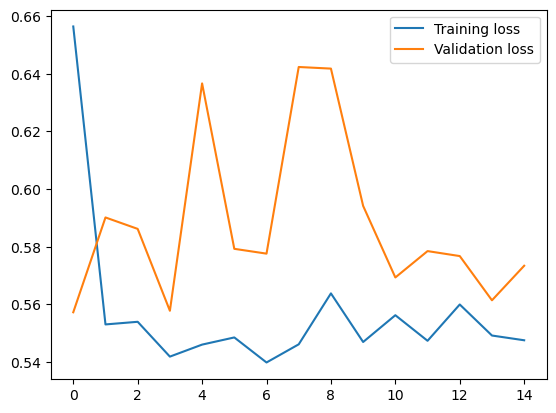

In [11]:
#改成sigmoid激活函数
class Net_sig(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 10)
        self.sigmoid = nn.Sigmoid ()
        
    def forward(self, x):
        # 确保输入的tensor是展开的单列数据，把每张图片的通道、长度、宽度三个维度都压缩为一列
        x = x.view(x.shape[0], -1)     
        x = self.sigmoid (self.fc1(x))
        x = self.sigmoid (self.fc2(x))
        x = func.log_softmax(self.fc3(x), dim=1)
        
        return x
    
#运行sigmoid模型
model = Net_sig()
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
epochs = 15
#开始训练
train(model, trainloader, testloader, loss_func, optimizer, epochs)

学习次数: 1/15	 训练误差: 1.03	 测试误差: 1.39	 模型分类准确率: 0.63
学习次数: 2/15	 训练误差: 1.14	 测试误差: 1.09	 模型分类准确率: 0.58
学习次数: 3/15	 训练误差: 1.11	 测试误差: 1.28	 模型分类准确率: 0.61
学习次数: 4/15	 训练误差: 1.09	 测试误差: 1.99	 模型分类准确率: 0.52
学习次数: 5/15	 训练误差: 1.04	 测试误差: 0.90	 模型分类准确率: 0.72
学习次数: 6/15	 训练误差: 1.10	 测试误差: 1.04	 模型分类准确率: 0.65
学习次数: 7/15	 训练误差: 1.08	 测试误差: 1.09	 模型分类准确率: 0.68
学习次数: 8/15	 训练误差: 1.09	 测试误差: 0.95	 模型分类准确率: 0.69
学习次数: 9/15	 训练误差: 1.05	 测试误差: 1.01	 模型分类准确率: 0.66
学习次数: 10/15	 训练误差: 1.05	 测试误差: 1.06	 模型分类准确率: 0.66
学习次数: 11/15	 训练误差: 1.07	 测试误差: 1.03	 模型分类准确率: 0.68
学习次数: 12/15	 训练误差: 1.08	 测试误差: 1.04	 模型分类准确率: 0.61
学习次数: 13/15	 训练误差: 1.07	 测试误差: 1.19	 模型分类准确率: 0.64
学习次数: 14/15	 训练误差: 1.08	 测试误差: 1.02	 模型分类准确率: 0.68
学习次数: 15/15	 训练误差: 1.06	 测试误差: 1.04	 模型分类准确率: 0.64


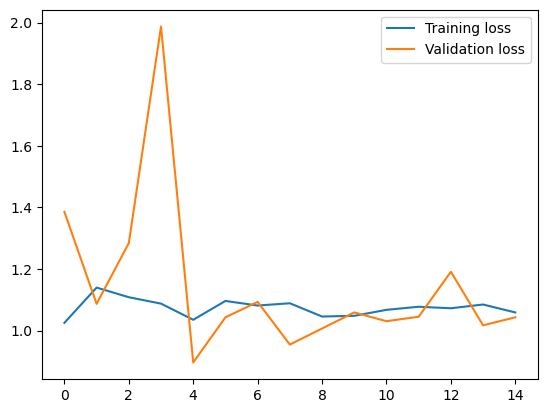

In [15]:
#改成tanh激活函数
class Net_tan(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 10)
        self.tanh = nn.Tanh()
        
    def forward(self, x):
        # 确保输入的tensor是展开的单列数据，把每张图片的通道、长度、宽度三个维度都压缩为一列
        x = x.view(x.shape[0], -1)     
        x = self.tanh (self.fc1(x))
        x = self.tanh (self.fc2(x))
        x = func.log_softmax(self.fc3(x), dim=1)
        
        return x
    
model = Net_tan()
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
train(model, trainloader, testloader, loss_func, optimizer, epochs)

ReLU激活函数计算简单，不需要指数运算，能减少计算负担，收敛速度较快，不受Sigmoid函数导致的梯度弥散问题影响。Tanh函数和Sigmoid函数一样，具有非线性特性，可以帮助模型更好地拟合非线性数据关系。但是在输入较大或较小的范围时，容易出现梯度弥散问题；计算量相对较大，速度较慢。

e:

学习次数: 1/15	 训练误差: 0.61	 测试误差: 0.47	 模型分类准确率: 0.83
学习次数: 2/15	 训练误差: 0.44	 测试误差: 0.46	 模型分类准确率: 0.84
学习次数: 3/15	 训练误差: 0.40	 测试误差: 0.43	 模型分类准确率: 0.85
学习次数: 4/15	 训练误差: 0.39	 测试误差: 0.43	 模型分类准确率: 0.85
学习次数: 5/15	 训练误差: 0.38	 测试误差: 0.45	 模型分类准确率: 0.84
学习次数: 6/15	 训练误差: 0.37	 测试误差: 0.43	 模型分类准确率: 0.85
学习次数: 7/15	 训练误差: 0.36	 测试误差: 0.45	 模型分类准确率: 0.85
学习次数: 8/15	 训练误差: 0.36	 测试误差: 0.42	 模型分类准确率: 0.86
学习次数: 9/15	 训练误差: 0.35	 测试误差: 0.43	 模型分类准确率: 0.86
学习次数: 10/15	 训练误差: 0.35	 测试误差: 0.44	 模型分类准确率: 0.86
学习次数: 11/15	 训练误差: 0.34	 测试误差: 0.43	 模型分类准确率: 0.86
学习次数: 12/15	 训练误差: 0.34	 测试误差: 0.44	 模型分类准确率: 0.86
学习次数: 13/15	 训练误差: 0.34	 测试误差: 0.43	 模型分类准确率: 0.85
学习次数: 14/15	 训练误差: 0.33	 测试误差: 0.43	 模型分类准确率: 0.86
学习次数: 15/15	 训练误差: 0.33	 测试误差: 0.43	 模型分类准确率: 0.86


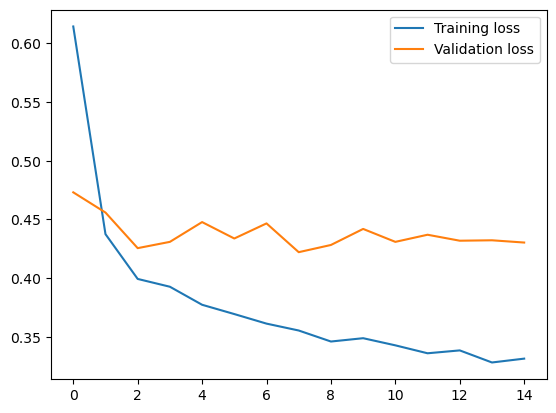

In [16]:
batch_size = 128
# 下载Fashion-MNIST训练集和测试集数据，并构建训练集数据载入器trainloader,每次从训练集中载入64张图片，每次载入都打乱顺序
trainloader_big = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader_big = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True)

model = Net_wide()
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
epochs = 15
train(model, trainloader_big, testloader_big, loss_func, optimizer, epochs)

学习次数: 1/15	 训练误差: 0.76	 测试误差: 0.63	 模型分类准确率: 0.79
学习次数: 2/15	 训练误差: 0.61	 测试误差: 0.64	 模型分类准确率: 0.77
学习次数: 3/15	 训练误差: 0.59	 测试误差: 0.56	 模型分类准确率: 0.82
学习次数: 4/15	 训练误差: 0.57	 测试误差: 0.65	 模型分类准确率: 0.81
学习次数: 5/15	 训练误差: 0.58	 测试误差: 0.61	 模型分类准确率: 0.81
学习次数: 6/15	 训练误差: 0.56	 测试误差: 0.58	 模型分类准确率: 0.81
学习次数: 7/15	 训练误差: 0.54	 测试误差: 0.64	 模型分类准确率: 0.76
学习次数: 8/15	 训练误差: 0.63	 测试误差: 0.67	 模型分类准确率: 0.78
学习次数: 9/15	 训练误差: 0.56	 测试误差: 0.59	 模型分类准确率: 0.81
学习次数: 10/15	 训练误差: 0.54	 测试误差: 0.66	 模型分类准确率: 0.81
学习次数: 11/15	 训练误差: 0.56	 测试误差: 0.58	 模型分类准确率: 0.81
学习次数: 12/15	 训练误差: 0.55	 测试误差: 0.71	 模型分类准确率: 0.78
学习次数: 13/15	 训练误差: 0.53	 测试误差: 0.59	 模型分类准确率: 0.81
学习次数: 14/15	 训练误差: 0.51	 测试误差: 0.56	 模型分类准确率: 0.82
学习次数: 15/15	 训练误差: 0.56	 测试误差: 0.56	 模型分类准确率: 0.82


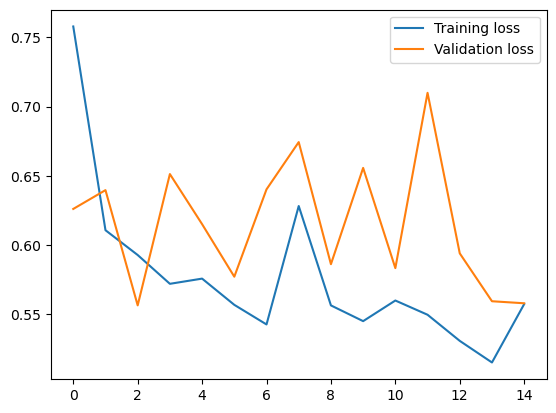

In [17]:
batch_size = 16
# 下载Fashion-MNIST训练集和测试集数据，并构建训练集数据载入器trainloader,每次从训练集中载入64张图片，每次载入都打乱顺序
trainloader_small = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader_small = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True)

model = Net_wide()
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
epochs = 15
train(model, trainloader_small, testloader_small, loss_func, optimizer, epochs)

从上面两张图可以看出，当训练批次的数据较大时，能较快的收敛，但存在过拟合的现象，当训练批次较小时，模型的准确率较低